In [1]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 999)

In [2]:
#from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline

In [3]:
data = pd.read_csv(
    "../data/JD5000_NLP.csv",
    engine="python",
    encoding="latin1"
)
data.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
#data.head(300)

In [4]:
data = data.loc[data['search_title'] != 'machine learning engineer']
#print(len(data), len(data2))

In [5]:
#Label Encoder from characters to numeric
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

le = LabelEncoder()
le.fit(data["search_title"])
data['search_title_le'] = le.transform(data["search_title"])
#data = data.loc[data['search_title_le'] != 3]
#data.head(100)

In [6]:
le.classes_

array(['data analyst', 'data engineer', 'data scientist'], dtype=object)

In [7]:
jd_dict = {0: le.classes_[0], 1: le.classes_[1], 2: le.classes_[2], }
jd_dict

{0: 'data analyst', 1: 'data engineer', 2: 'data scientist'}

In [8]:
n_classes = len(jd_dict)
n_classes

3

In [9]:
y_roc = label_binarize(data['search_title_le'] , classes=[0,1,2])
y_roc

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [10]:
# tst = set(le.transform(data["search_title"]))
# set(le.transform(data["search_title"]))

In [11]:
#le.inverse_transform(list(tst))

In [12]:
#data['search_title_le'].value_counts()

In [13]:
#cleaning
def clean_text(text):
    # Removing the @
    text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
    # Removing the URL links
    text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
    # Keeping only letters
    text = re.sub(r"[^a-zA-Z.!?']", ' ', text)
    # change capital to lowercase
    text = text.lower()
    # Removing additional whitespaces
    text = re.sub(r" +", ' ', text)
    return text

In [14]:
data_clean = [clean_text(text) for text in data.description]
#len(data_clean), data_clean

In [15]:
data_labels = data['search_title_le']
#data_labels, len(data_labels)
#data_labels[data_labels == 1] = 5
#data_labels

In [16]:
X = data["description"] # Note that it is a Series rather than a DataFrame here
y = data['search_title_le']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [18]:
#y_train

In [19]:
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
import re

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nichangyuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def stem_tokenizer(text):
    stemmer = EnglishStemmer(ignore_stopwords=True)
    # Removing the URL links
    words = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
    words = re.sub(r"[^A-Za-z0-9\-]", " ", words).lower().split()
    words = [stemmer.stem(word) for word in words]
    return words

In [23]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'),
                        tokenizer=stem_tokenizer,
                        lowercase=True,
                        max_df=0.9,
                        min_df=1,
                        ngram_range=(1, 3)
                       )

In [24]:
#X_train, y_train

In [25]:
# Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [28]:
cv = CountVectorizer(stop_words=stopwords.words('english'),
                     tokenizer=stem_tokenizer,
                     lowercase=True,
                     max_df=0.4,
                     min_df=5,
                     ngram_range=(2, 3),
                     binary=False
                    )

In [29]:
nbclassifier = Pipeline([('cv', cv),  

                         ('nb', MultinomialNB())
                        ])

In [30]:
nbclassifier = nbclassifier.fit(X_train, y_train)

In [31]:
print(classification_report(y_test, nbclassifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       645
           1       0.92      0.79      0.85       397
           2       0.78      0.88      0.83       409

    accuracy                           0.86      1451
   macro avg       0.86      0.86      0.86      1451
weighted avg       0.87      0.86      0.86      1451



In [32]:
#set(y_test) - set(nbclassifier.predict(X_test))

In [33]:
from sklearn.metrics import accuracy_score

print ("y_train Accuracy Rate, which is calculated by accuracy_score() is: %.3f"\
       %accuracy_score(y_train, nbclassifier.predict(X_train)) )
print ("y_test Accuracy Rate, which is calculated by accuracy_score() is: %.3f"\
       %accuracy_score(y_test, nbclassifier.predict(X_test)) )

y_train Accuracy Rate, which is calculated by accuracy_score() is: 0.946
y_test Accuracy Rate, which is calculated by accuracy_score() is: 0.864


In [36]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, nbclassifier.predict(X_train))
cm

array([[1434,   18,   50],
       [  28,  831,   26],
       [  42,   20,  936]])

In [37]:
cm = confusion_matrix(y_test, nbclassifier.predict(X_test))
cm

array([[581,  15,  49],
       [ 31, 313,  53],
       [ 36,  13, 360]])

In [39]:
# to get ROC AUC score, we need to do it individually for each class with one-vs-rest approach

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_roc, test_size=0.3, random_state=2020)

# classifier
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

clf = OneVsRestClassifier(MultinomialNB())

nbclassifier2 = Pipeline([('cv', cv),  
                         ('smt', SMOTE (random_state=42)), 
                         ('nb', OneVsRestClassifier(MultinomialNB()))
                        ])

nbclassifier2 = nbclassifier2.fit(X_train2, y_train2)

y_score = nbclassifier2.predict_proba(X_test)
y_score, len(y_score), len(y_test), y_test2

/Users/nichangyuan/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


(array([[6.00656547e-044, 1.58532225e-048, 1.00000000e+000],
        [1.00000000e+000, 1.47742916e-066, 1.00000000e+000],
        [1.00000000e+000, 5.39692785e-029, 2.05881399e-014],
        ...,
        [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
        [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [7.27037588e-040, 3.76022065e-138, 1.00000000e+000]]),
 1451,
 1451,
 array([[0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1]]))

In [41]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.int32(y_test2[:, i]), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

roc_auc[0], roc_auc[1], roc_auc[2]

(0.9340739030911573, 0.9385607903679877, 0.9367670316158975)

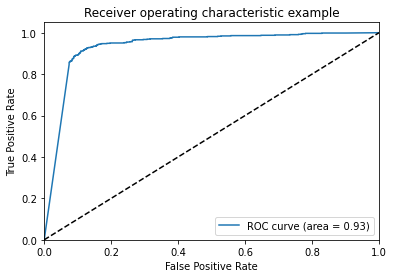

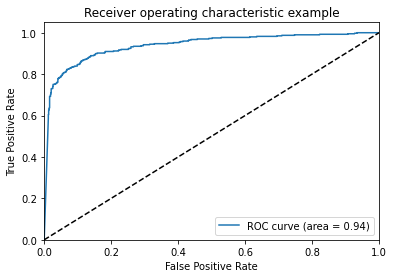

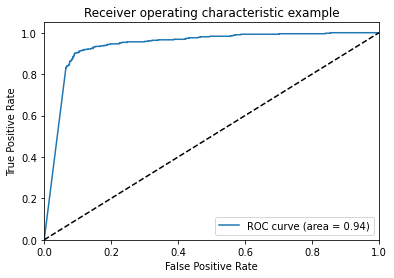

In [42]:
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [43]:
test = pd.Series("""The world is facing a medical crisis, bacteria are increasingly evolving resistance to even our strongest antibiotics. The problem is already very real and immediate; for example, bloodstream infection leading to sepsis is now responsible for more than half of all deaths in hospitals and is the most expensive condition treated in hospitals. Sepsis mortality rate increases >6% every hour without effective antibiotic treatment. Yet, despite the life and death urgency, and healthcare cost impacts, current methodologies require 3 days to determine the correct antibiotic.

Specific Diagnostics has developed a breakthrough solution to rapidly determine the effective antibiotic treatment for bloodstream and other acute infections. Used for bloodstream infection Specific’s solution provides results 2 days sooner than existing methods, saving patients suffering from drug-resistant infection.

We have been funded by nearly $30 M in non-dilutive government sponsored research support and recently $17.5 M in venture capital. This is an opportunity to join us at an inflection point in our commercial growth as we bring our first key product to market and with recognition from major customers fueling an expansion of our staff.

_The Job_
**This is the job for you if want to be where your ideas to be central to a world-changing and lifesaving product. Data science and analytics are at the core of our company we are seeking an exceptional talent to join our team. You will be a key contributor and critical to the success of the company. The main analysis tasks you are expected to contribute to are:

Analytical methods and statistical analysis for processing high-volume, temporal high-dimensional data streams generated in real-time from our proprietary sensor technology.
The development of data-driven visualization tools for the explorative analysis of high-dimensional data.
The application and development of suitable pre-processing, feature-selection and dimensional reduction techniques to detect, measure and account for data artifacts.
The development and validation of applications for a medical instrument built under the guidance of a senior manager experienced in the application development discipline (so you’ll be learning the valuable skill of integrating your work into applications for medical diagnostic devices).
Algorithm development for decisions and measurements from multi-dimensional data streams.
This is not the job for a numbers only person. We want someone with a passion for and experience in the sciences that will lead you to look deeply into the sources of the data along with the scientists so that the data analysis is influenced by the science of our diagnostic technology and the science is influenced by the analysis.

You
You have a proven track record of successfully developing, validating and deploying data analysis and analytical methods to solve challenging real-world applications. You are deeply familiar with a broad range of analytical models and are at the pulse of developments in the field. Ideally you have proven expertise in the analysis of spatio-temporal data. You have a strong domain knowledge in the field of statistical analysis and signal processing. You should have a track record of success in your education and projects and have these characteristics and skills:

MS degree in computer sciences, biomedical engineering, or related field and at least 5 years of interesting relevant experience.
Expert in R and proficient with C++ and Python.
Expertise in analytical methods and statistical analysis.
Proficiency in SQL as well as NoSQL database technologies a plus.
Full fluency (verbal and written) of the English language is a must.
""")

In [44]:
nbclassifier.predict_proba(test)

array([[2.65577356e-21, 7.55124524e-21, 1.00000000e+00]])

In [45]:
nbclassifier2.predict_proba(test)

array([[2.15271033e-15, 8.28174828e-24, 1.00000000e+00]])

In [46]:
pred = nbclassifier.predict_proba(test)

In [47]:
for inx, ele in enumerate(pred[0]):
    cat = 0
    Max = -1
    if ele > Max:
        cat, Max = inx, ele


In [48]:
print("This job is categorized as {} with a probability of {}%"\
      .format(jd_dict[cat].upper(), str(round(100*Max, 3))))

This job is categorized as DATA SCIENTIST with a probability of 100.0%


In [49]:
print("ROC AUC (One-vs-Rest) of this class is {}".format(roc_auc[cat]))

ROC AUC (One-vs-Rest) of this class is 0.9367670316158975


In [50]:
nbclassifier.predict(test)
#test = pd.Series(test)

array([2])

In [51]:
test2 = pd.Series("""Summary:
Gather, decompose, and document requirements needed to build reports for our Operations and Finance partners
Practice iterative, end-to-end development, to rapidly develop and deliver complex reports and dashboards, as required by business stakeholders
Understands and applies technical and reporting best practices
Articulate issues, problems, impacts, and needs across internal and external teams
Innovate and suggest out-of-the-box solutions to improve productivity and processes
Writes complex SQL as necessary to extract and transform data for reports or dashboards

Skills: 
3+ years hands-on experience using SAP Business Objects (BOBJ), Oracle EBS/Cloud Reporting tools, Oracle Transactional Business Intelligence (OTBI)
Experience using at least one Oracle ERP Module (O2C, P2P, I2R, MDM, OTBI, Finance/Accounting)
Expert level report requirements gathering, designing, developing, and testing reports to meet business needs
Strong understanding of data management
Ability to operating independently, be detail-oriented, and deliver results
Excellent communication and project management skills across a broad range of audiences
""")

In [52]:
nbclassifier.predict_proba(test2)

array([[9.99999998e-01, 1.91008458e-09, 1.10007896e-14]])

In [53]:
nbclassifier.predict(test2)
#test = pd.Series(test)

array([0])

In [54]:
test3 = pd.Series("""Medical Device Start up is looking for a Lab Technician. 

Job Duties:
Help build up components in support of development team experiments
Run simple engineering experiments under the guidance of a scientist or engineer
Help qualify lots of reagents or engineering assemblies using established protocols
Working with bio-hazardous materials and infectious agents.
Following Good Documentation Practice (GDP) and record all data and results from experiments in a laboratory notebook
Requirements:
Entry level position 

Strong attention to detail 

Strong manual dexterity 

Experience in laboratory in academic or industrial setting preferred 

Education:
Bachelor's Degree, preferably in a scientific field.
BS in biological science (or related) preferred, not required
About Aerotek:
Your success starts with the right career opportunity. Aerotek uses a people-focused approach to connect job seekers to incredible opportunities with leading organizations. Established in 1983, we've grown to become a consistent Best of Staffing® winner for talent satisfaction because of our dedication to exceptional service. Serving over 300,000 contract workers every year, we specialize in placing workers with engineering, scientific, professional and industrial skill sets. Aerotek is proud to offer competitive benefits, including contributory medical, dental and vision insurance, weekly pay, discounts on consumer goods and services and more.
""")

In [55]:
nbclassifier.predict_proba(test3)

array([[8.20070017e-01, 5.12899851e-07, 1.79929470e-01]])

In [56]:
nbclassifier.predict(test3)
#test = pd.Series(test)

array([0])